In [1]:
# Importing the necessary libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from keras import layers, models
from keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPooling2D, BatchNormalization, ReLU
from keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

from sklearn.metrics import classification_report

tf.random.set_seed(23)

import os
import cv2
import random
import warnings
warnings.filterwarnings('ignore')

2024-04-23 15:00:33.645332: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-23 15:00:33.645435: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-23 15:00:33.769562: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
# !pip install tensorflow[and-cuda]
# !pip install tensorflow[and-cuda]==2.13.0 --user

In [3]:
train_path = '/kaggle/input/pneumonia-tuberculosis-normal/Train'
test_path = '/kaggle/input/pneumonia-tuberculosis-normal/Test'
img_width,img_height,channel = 96,96,3

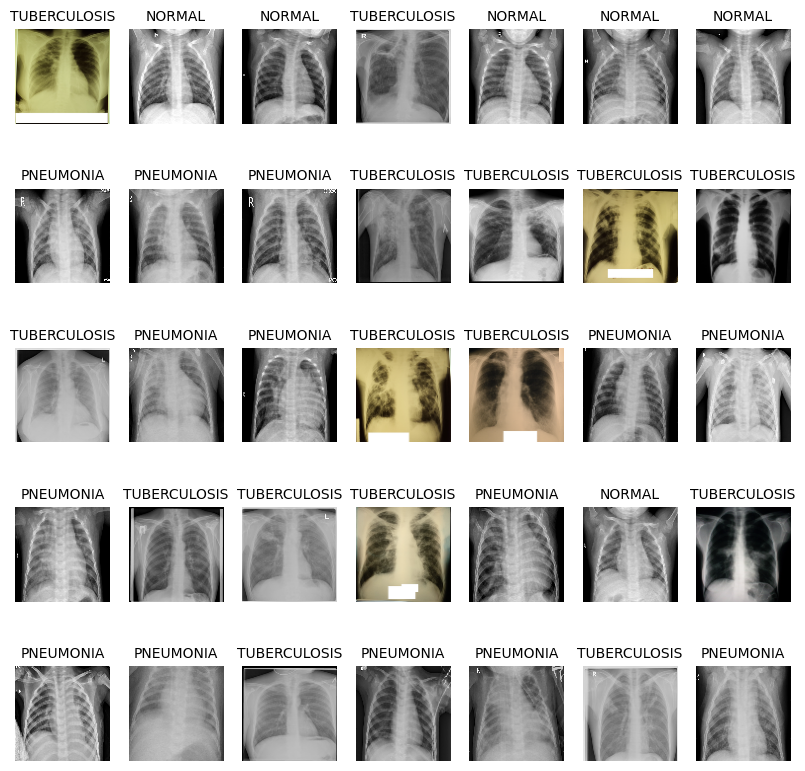

In [4]:
classes = ['PNEUMONIA','TUBERCULOSIS','NORMAL']
# we will import the train data , using this code
def import_data(dataset, path, categories):
    for i in categories:
        full_path = os.path.join(path,i)
        label = categories.index(i)
        for j in os.listdir(full_path):
            try:
                img = cv2.imread(os.path.join(full_path,j))
                img_resized = cv2.resize(img,(img_width,img_height))
                dataset.append([img_resized,label])
            except :
                pass
    random.shuffle(dataset)
    
# creating the dataset

train_df = []
import_data(train_df,train_path,classes)
train_df = pd.DataFrame(train_df,columns=['image','label'])
train_stack = np.stack(train_df.image)

# Images,
plt.figure(figsize=(10,10))
for i in range(35):
    plt.subplot(5,7,i+1)
    plt.imshow(train_df.image[i])
    plt.title(classes[train_df.label[i]],size=10)
    plt.axis('off')

In [5]:
# Train dataset
train_df.head(5)

,image,label
0,"[[[185, 194, 119], [186, 194, 123], [196, 207,...",1
1,"[[[100, 100, 100], [104, 104, 104], [116, 116,...",2
2,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",2
3,"[[[235, 235, 235], [216, 216, 216], [216, 216,...",1
4,"[[[15, 15, 15], [32, 32, 32], [54, 54, 54], [6...",2


In [6]:
train_df.label.value_counts()

label
2    700
0    700
1    655
Name: count, dtype: int64

In [7]:
# Loading the pretrained models :
from tensorflow.keras.applications import VGG16, VGG19, ResNet50, ResNet101, InceptionV3, MobileNet, Xception, NASNetMobile
from tensorflow.keras.applications import DenseNet121, EfficientNetB0

#DenseNet121---------------------------------------------->
densenet121 = DenseNet121(
    include_top = False,
    weights='imagenet',
    input_shape = (img_width,img_height,3))

densenet121.trainable = False

#EfficientNetB0------------------------------------------->
efficientnetB0 = EfficientNetB0(
    include_top = False,
    weights='imagenet',
    input_shape = (img_width,img_height,3))

efficientnetB0.trainable = False

#InceptionV3---------------------------------------------->
inceptionv3 = InceptionV3(
    include_top = False,
    weights='imagenet',
    input_shape = (img_width,img_height,3))

inceptionv3.trainable = False

#MobileNet----------------------------------------------->
mobilenet = MobileNet(
    include_top = False,
    weights='imagenet',
    input_shape = (img_width,img_height,3))

mobilenet.trainable = False

#Xception----------------------------------------------->
xception = Xception(
    include_top = False,
    weights='imagenet',
    input_shape = (img_width,img_height,3))

xception.trainable = False

#NASNetMobile--------------------------------------------->
nasnetmobile = NASNetMobile(
    include_top = False,
    weights='imagenet',
    input_shape = (img_width,img_height,3))

nasnetmobile.trainable = False

#vgg16--------------------------------------------------->
vgg16 = VGG16(
    include_top = False,
    weights='imagenet',
    input_shape = (img_width,img_height,3))

vgg16.trainable = False

#vgg19-------------------------------------------------->
vgg19 = VGG19(
    include_top = False,
    weights='imagenet',
    input_shape = (img_width,img_height,3))

vgg19.trainable = False

#Resnet50----------------------------------------------->
resnet50 = ResNet50(
    include_top = False,
    weights='imagenet',
    input_shape = (img_width,img_height,3))

resnet50.trainable = False

#Resnet101----------------------------------------------->
resnet101 = ResNet101(
    include_top = False,
    weights='imagenet',
    input_shape = (img_width,img_height,3))

resnet101.trainable = False


29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
19993432/19993432 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
171446536/171446536 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [8]:
# model_1 NASNetMobile 

# let's build and train the model 
model_1 = Sequential()
model_1.add(nasnetmobile)
#ann layers
model_1.add(layers.Flatten())

model_1.add(layers.BatchNormalization())
model_1.add(layers.Dense(units=128,activation='relu', kernel_regularizer = keras.regularizers.l2(0.04)))
model_1.add(layers.Dropout(0.2))



#no of classes is 3
model_1.add(layers.Dense(units=3,activation='softmax'))

model_1.compile(optimizer=Adam(learning_rate=0.01), loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])


model_1.fit(train_stack,train_df.label,epochs=20, validation_split = 0.2)

Epoch 1/20
 3/52 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.3941 - loss: 10.4812  

I0000 00:00:1713884563.431828      74 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1713884563.539741      74 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step - accuracy: 0.6763 - loss: 9.1687

W0000 00:00:1713884579.861547      75 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1713884593.598015      75 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


52/52 ━━━━━━━━━━━━━━━━━━━━ 80s 799ms/step - accuracy: 0.6775 - loss: 9.1177 - val_accuracy: 0.8078 - val_loss: 2.2191
Epoch 2/20
 5/52 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.7456 - loss: 2.2202

W0000 00:00:1713884604.273272      76 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.7429 - loss: 1.8655 - val_accuracy: 0.8248 - val_loss: 1.1063
Epoch 3/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.8113 - loss: 1.1789 - val_accuracy: 0.8127 - val_loss: 1.1612
Epoch 4/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.7925 - loss: 1.2347 - val_accuracy: 0.8345 - val_loss: 1.0930
Epoch 5/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.7931 - loss: 1.3156 - val_accuracy: 0.8370 - val_loss: 1.1553
Epoch 6/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.7796 - loss: 1.3095 - val_accuracy: 0.8151 - val_loss: 1.1129
Epoch 7/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.7935 - loss: 1.2048 - val_accuracy: 0.8443 - val_loss: 0.9757
Epoch 8/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.8067 - loss: 1.1658 - val_accuracy: 0.8127 - val_loss: 1.3366
Epoch 9/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8062 - loss: 1.3259 - val_accuracy: 0.8540 - val_loss: 1.

<Axes: title={'center': 'NASNetMobile'}>

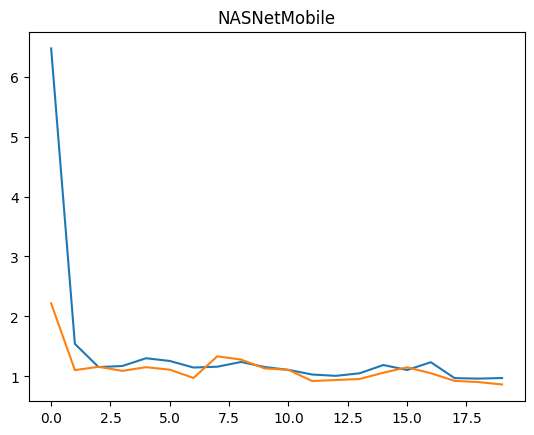

In [9]:
plt.title('NASNetMobile')
sns.lineplot(model_1.history.history['loss'])
sns.lineplot(model_1.history.history['val_loss'])

In [10]:
# model_2 EfficientNetB0

# let's build and train the model 
model_2 = Sequential()
model_2.add(efficientnetB0)
#ann layers
model_2.add(layers.Flatten())

# model_2.add(layers.BatchNormalization())
model_2.add(layers.Dense(units=256,activation='relu'))
model_2.add(layers.Dropout(0.4 ))



#no of classes is 3
model_2.add(layers.Dense(units=3,activation='softmax'))
model_2.compile(optimizer=Adam(learning_rate=0.0009), loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

model_2.fit(train_stack,train_df.label,epochs=20, validation_split = 0.2)

Epoch 1/20
11/52 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5511 - loss: 1.5548

W0000 00:00:1713884661.950938      73 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step - accuracy: 0.7498 - loss: 0.9714

W0000 00:00:1713884682.574531      74 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1713884688.190057      75 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


52/52 ━━━━━━━━━━━━━━━━━━━━ 65s 644ms/step - accuracy: 0.7518 - loss: 0.9643 - val_accuracy: 0.9635 - val_loss: 0.1116
Epoch 2/20
 8/52 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9387 - loss: 0.1676

W0000 00:00:1713884694.781799      73 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9365 - loss: 0.1713 - val_accuracy: 0.9635 - val_loss: 0.0995
Epoch 3/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9537 - loss: 0.1342 - val_accuracy: 0.9538 - val_loss: 0.1253
Epoch 4/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9570 - loss: 0.1254 - val_accuracy: 0.9684 - val_loss: 0.1004
Epoch 5/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9604 - loss: 0.1137 - val_accuracy: 0.9611 - val_loss: 0.1152
Epoch 6/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9621 - loss: 0.0977 - val_accuracy: 0.9708 - val_loss: 0.0855
Epoch 7/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9672 - loss: 0.0850 - val_accuracy: 0.9635 - val_loss: 0.1076
Epoch 8/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9667 - loss: 0.0709 - val_accuracy: 0.9708 - val_loss: 0.0896
Epoch 9/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9686 - loss: 0.0849 - val_accuracy: 0.9635 - val_loss: 0.

<Axes: title={'center': 'EfficientNetB0'}>

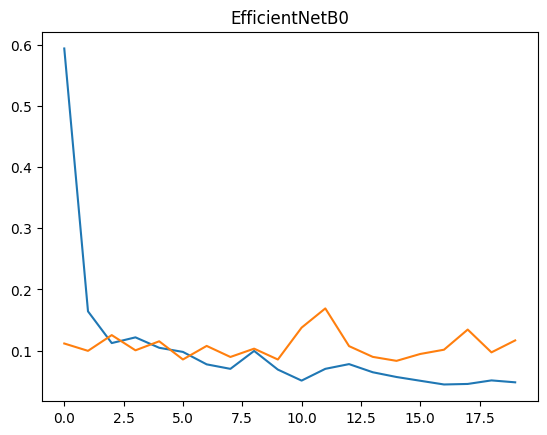

In [11]:
plt.title('EfficientNetB0')
sns.lineplot(model_2.history.history['loss'])
sns.lineplot(model_2.history.history['val_loss'])

In [12]:
# model_3 vgg16
# let's build and train the model 
model_3 = Sequential()
model_3.add(vgg16)
# ann layers
model_3.add(layers.Flatten())

model_3.add(layers.BatchNormalization())
model_3.add(layers.Dense(units=128,activation='relu',kernel_regularizer = keras.regularizers.l2(0.04)))
model_3.add(layers.Dropout(0.57))

model_3.add(layers.BatchNormalization())
model_3.add(layers.Dense(units=64,activation='relu'))
model_3.add(layers.Dropout(0.5))

#no of classes is 3
model_3.add(layers.Dense(units=3,activation='softmax'))

model_3.compile(optimizer=Adam(learning_rate=0.0007), loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])


model_3.fit(train_stack,train_df.label,epochs=20, validation_split = 0.2)

Epoch 1/20
 5/52 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.3797 - loss: 11.1563

W0000 00:00:1713884722.700372      76 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step - accuracy: 0.6097 - loss: 8.9014

W0000 00:00:1713884731.517141      74 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1713884732.533686      74 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


52/52 ━━━━━━━━━━━━━━━━━━━━ 30s 328ms/step - accuracy: 0.6122 - loss: 8.8699 - val_accuracy: 0.9343 - val_loss: 4.6803
Epoch 2/20
 6/52 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.8721 - loss: 4.7582

W0000 00:00:1713884739.439329      74 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.8903 - loss: 4.1365 - val_accuracy: 0.9611 - val_loss: 2.3927
Epoch 3/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9160 - loss: 2.1798 - val_accuracy: 0.9562 - val_loss: 1.3695
Epoch 4/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9391 - loss: 1.3190 - val_accuracy: 0.9708 - val_loss: 0.8818
Epoch 5/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9442 - loss: 0.8832 - val_accuracy: 0.9659 - val_loss: 0.6865
Epoch 6/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9513 - loss: 0.6931 - val_accuracy: 0.9659 - val_loss: 0.5871
Epoch 7/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9467 - loss: 0.5994 - val_accuracy: 0.9635 - val_loss: 0.5323
Epoch 8/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9392 - loss: 0.5926 - val_accuracy: 0.9659 - val_loss: 0.6149
Epoch 9/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9452 - loss: 0.6456 - val_accuracy: 0.9659 - val_loss: 0.

<Axes: title={'center': 'VGG16'}>

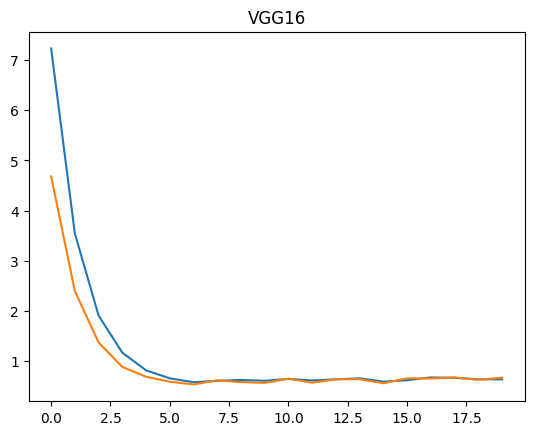

In [13]:
plt.title('VGG16')
sns.lineplot(model_3.history.history['loss'])
sns.lineplot(model_3.history.history['val_loss'])

In [14]:
# model_4 vgg19
# let's build and train the model 
model_4 = Sequential()
model_4.add(vgg19)
#ann layers
model_4.add(layers.Flatten())

model_4.add(layers.BatchNormalization())
model_4.add(layers.Dense(units=128,activation='relu', kernel_regularizer = keras.regularizers.l2(0.04)))
model_4.add(layers.Dropout(0.5))

model_4.add(layers.BatchNormalization())
model_4.add(layers.Dense(units=128,activation='relu', kernel_regularizer = keras.regularizers.l2(0.04)))
model_4.add(layers.Dropout(0.5))

#no of classes is 3
model_4.add(layers.Dense(units=3,activation='softmax'))

model_4.compile(optimizer=Adam(learning_rate=0.0007), loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

model_4.fit(train_stack,train_df.label,epochs=20, validation_split = 0.2)

Epoch 1/20
 3/52 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.2674 - loss: 16.4628

W0000 00:00:1713884781.386127      76 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.6353 - loss: 13.5862

W0000 00:00:1713884787.111294      76 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1713884788.204453      74 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


52/52 ━━━━━━━━━━━━━━━━━━━━ 14s 155ms/step - accuracy: 0.6382 - loss: 13.5459 - val_accuracy: 0.9465 - val_loss: 7.9456
Epoch 2/20
 3/52 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.8385 - loss: 8.1989

W0000 00:00:1713884789.314002      74 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.8968 - loss: 6.9467 - val_accuracy: 0.9562 - val_loss: 4.1551
Epoch 3/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.9470 - loss: 3.6545 - val_accuracy: 0.9732 - val_loss: 2.2626
Epoch 4/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.9558 - loss: 2.0108 - val_accuracy: 0.9635 - val_loss: 1.3376
Epoch 5/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.9584 - loss: 1.2273 - val_accuracy: 0.9659 - val_loss: 0.8813
Epoch 6/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.9562 - loss: 0.8174 - val_accuracy: 0.9708 - val_loss: 0.6330
Epoch 7/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.9630 - loss: 0.5919 - val_accuracy: 0.9684 - val_loss: 0.5183
Epoch 8/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.9720 - loss: 0.5008 - val_accuracy: 0.9562 - val_loss: 0.5001
Epoch 9/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.9684 - loss: 0.4718 - val_accuracy: 0.9659 - val_loss: 0.

<Axes: title={'center': 'VGG19'}>

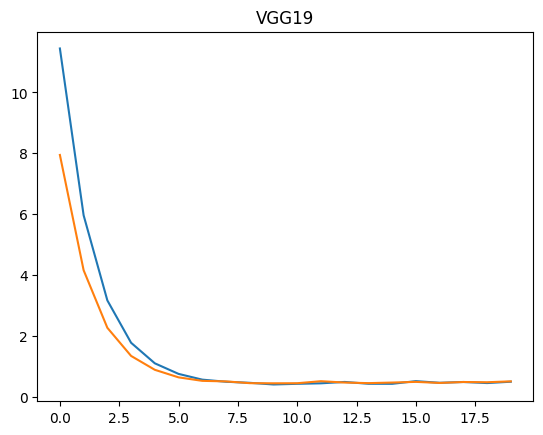

In [15]:
plt.title('VGG19')
sns.lineplot(model_4.history.history['loss'])
sns.lineplot(model_4.history.history['val_loss'])

In [16]:
# model_5 resnet50

# let's build and train the model 
model_5 = Sequential()
model_5.add(resnet50)
#ann layers
model_5.add(layers.Flatten())

model_5.add(layers.BatchNormalization())
model_5.add(layers.Dense(units=64,activation='relu',kernel_regularizer = keras.regularizers.l2(0.04)))
model_5.add(layers.Dropout(0.6))


model_5.add(layers.Dense(units=3,activation='softmax'))

model_5.compile(optimizer=Adam(learning_rate=0.0006), loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])


model_5.fit(train_stack,train_df.label,epochs=20, validation_split = 0.2)

Epoch 1/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step - accuracy: 0.7851 - loss: 5.6008

W0000 00:00:1713884856.317560      76 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


52/52 ━━━━━━━━━━━━━━━━━━━━ 32s 324ms/step - accuracy: 0.7865 - loss: 5.5884 - val_accuracy: 0.9513 - val_loss: 3.8654
Epoch 2/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9209 - loss: 3.6305 - val_accuracy: 0.9611 - val_loss: 2.7108
Epoch 3/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9406 - loss: 2.4696 - val_accuracy: 0.9611 - val_loss: 1.9610
Epoch 4/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9514 - loss: 1.9028 - val_accuracy: 0.9611 - val_loss: 1.6426
Epoch 5/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9415 - loss: 1.5516 - val_accuracy: 0.9659 - val_loss: 1.4335
Epoch 6/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9427 - loss: 1.3706 - val_accuracy: 0.9489 - val_loss: 1.3085
Epoch 7/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9487 - loss: 1.2025 - val_accuracy: 0.9538 - val_loss: 1.1620
Epoch 8/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9461 - loss: 1.1474 - val_accuracy: 0.9611 - val_loss: 

<Axes: title={'center': 'Resnet50'}>

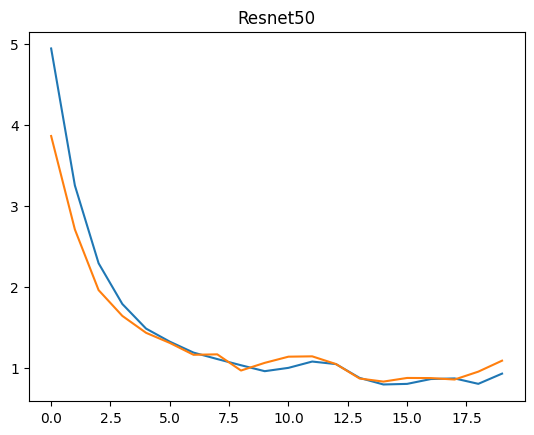

In [17]:
plt.title('Resnet50')
sns.lineplot(model_5.history.history['loss'])
sns.lineplot(model_5.history.history['val_loss'])

In [18]:
# model_6 Resnet101
 
# let's build and train the model 
model_6 = Sequential()
model_6.add(resnet101)
#ann layers
model_6.add(layers.Flatten())

# model_6.add(layers.BatchNormalization())
model_6.add(layers.Dense(units=64,activation='relu'))
model_6.add(layers.Dropout(0.4))


#no of classes is 3
model_6.add(layers.Dense(units=3,activation='softmax'))

model_6.compile(optimizer=Adam(learning_rate=0.0009), loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])


model_6.fit(train_stack,train_df.label,epochs=20, validation_split = 0.2)

Epoch 1/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step - accuracy: 0.6779 - loss: 3.3547

W0000 00:00:1713884920.119309      73 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


52/52 ━━━━━━━━━━━━━━━━━━━━ 38s 370ms/step - accuracy: 0.6799 - loss: 3.3181 - val_accuracy: 0.9489 - val_loss: 0.1770
Epoch 2/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.8750 - loss: 0.2911 - val_accuracy: 0.9757 - val_loss: 0.1198
Epoch 3/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.8806 - loss: 0.2212 - val_accuracy: 0.9562 - val_loss: 0.1450
Epoch 4/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.9361 - loss: 0.1702 - val_accuracy: 0.9635 - val_loss: 0.1550
Epoch 5/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.9440 - loss: 0.1413 - val_accuracy: 0.9659 - val_loss: 0.1259
Epoch 6/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.9547 - loss: 0.1559 - val_accuracy: 0.9635 - val_loss: 0.1114
Epoch 7/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.9401 - loss: 0.1524 - val_accuracy: 0.9538 - val_loss: 0.1484
Epoch 8/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.9582 - loss: 0.1289 - val_accuracy: 0.9659 - val_loss: 

<Axes: title={'center': 'Resnet101'}>

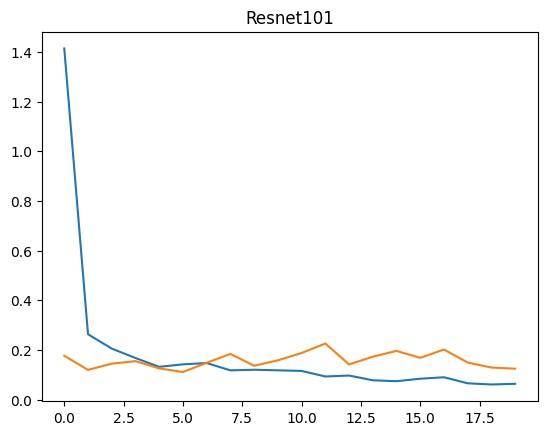

In [19]:
plt.title('Resnet101')
sns.lineplot(model_6.history.history['loss'])
sns.lineplot(model_6.history.history['val_loss'])

In [20]:
# model_7 DenseNet121

# let's build and train the model 
model_7 = Sequential()
model_7.add(densenet121)
#ann layers
model_7.add(layers.Flatten())

# model.add(layers.BatchNormalization())
model_7.add(layers.Dense(units=128,activation='relu',kernel_regularizer = keras.regularizers.l2(0.04)))
model_7.add(layers.Dropout(0.2))


#no of classes is 3
model_7.add(layers.Dense(units=3,activation='softmax'))

model_7.compile(optimizer=Adam(learning_rate=0.0009), loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])


model_7.fit(train_stack,train_df.label,epochs=20, validation_split = 0.2)

Epoch 1/20
 7/52 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.4628 - loss: 34.6386

W0000 00:00:1713885009.681176      74 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step - accuracy: 0.6948 - loss: 14.9498

W0000 00:00:1713885025.672367      73 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1713885035.416479      73 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


52/52 ━━━━━━━━━━━━━━━━━━━━ 69s 758ms/step - accuracy: 0.6971 - loss: 14.8110 - val_accuracy: 0.9465 - val_loss: 3.2771
Epoch 2/20


W0000 00:00:1713885048.342030      74 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


52/52 ━━━━━━━━━━━━━━━━━━━━ 28s 27ms/step - accuracy: 0.9268 - loss: 3.0306 - val_accuracy: 0.9586 - val_loss: 2.3104
Epoch 3/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9358 - loss: 2.1911 - val_accuracy: 0.9586 - val_loss: 1.7567
Epoch 4/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9393 - loss: 1.6838 - val_accuracy: 0.9611 - val_loss: 1.3950
Epoch 5/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9437 - loss: 1.3700 - val_accuracy: 0.9611 - val_loss: 1.1513
Epoch 6/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9384 - loss: 1.1368 - val_accuracy: 0.9440 - val_loss: 0.9816
Epoch 7/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9373 - loss: 0.9801 - val_accuracy: 0.9611 - val_loss: 0.8282
Epoch 8/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9558 - loss: 0.8246 - val_accuracy: 0.9586 - val_loss: 0.7219
Epoch 9/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9450 - loss: 0.7253 - val_accuracy: 0.9611 - val_loss: 0

<Axes: title={'center': 'DenseNet121'}>

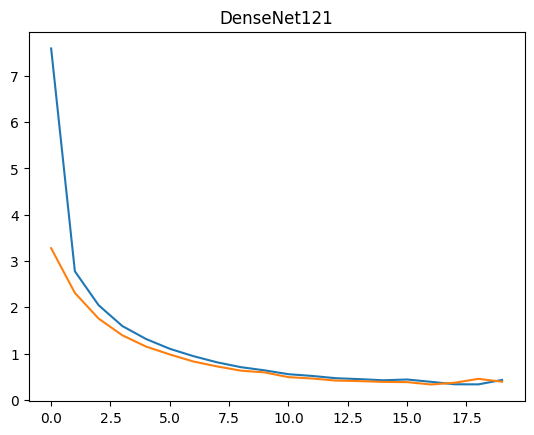

In [21]:
plt.title('DenseNet121')
sns.lineplot(model_7.history.history['loss'])
sns.lineplot(model_7.history.history['val_loss'])

In [22]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True,start_from_epoch=25)

In [23]:
# model_8  vgg16 + cnn
tf.random.set_seed(23)
# let's build and train the model 
model_8 = Sequential()
model_8.add(vgg16)
model_8.add(layers.Conv2D(32,(4,4),padding = 'same',activation = 'relu'))
model_8.add(layers.Dropout(0.2))

# ann layers
model_8.add(layers.Flatten())
model_8.add(layers.BatchNormalization())
model_8.add(layers.Dense(units=64,activation='relu',kernel_regularizer = keras.regularizers.l2(0.04)))
model_8.add(layers.Dropout(0.2))

#no of classes is 3
model_8.add(layers.Dense(units=3,activation='softmax'))
model_8.compile(optimizer=Adam(learning_rate=0.00015), loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

model_8.fit(train_stack, train_df. label,epochs=20, validation_split = 0.2, callbacks = early_stopping)

Epoch 1/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 14s 144ms/step - accuracy: 0.6646 - loss: 4.9257 - val_accuracy: 0.9270 - val_loss: 4.0613
Epoch 2/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9169 - loss: 4.0325 - val_accuracy: 0.9538 - val_loss: 3.6232
Epoch 3/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9444 - loss: 3.5906 - val_accuracy: 0.9611 - val_loss: 3.2457
Epoch 4/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9533 - loss: 3.1859 - val_accuracy: 0.9586 - val_loss: 2.9028
Epoch 5/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9737 - loss: 2.8087 - val_accuracy: 0.9611 - val_loss: 2.5815
Epoch 6/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9701 - loss: 2.4843 - val_accuracy: 0.9611 - val_loss: 2.2786
Epoch 7/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9829 - loss: 2.1721 - val_accuracy: 0.9635 - val_loss: 2.0071
Epoch 8/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9838 - loss: 1.9024 - val_accuracy: 0.9659 -

<Axes: title={'center': 'VGG16+CNN'}>

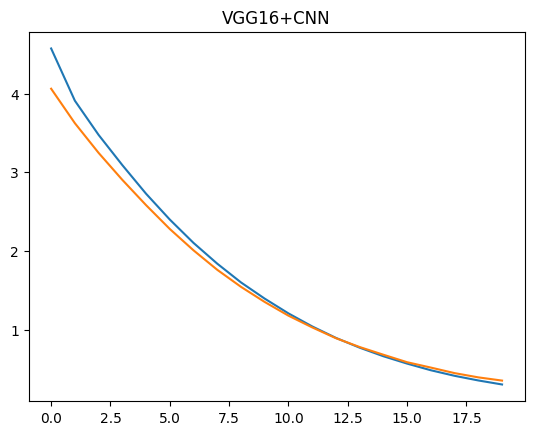

In [24]:
plt.title('VGG16+CNN')
sns.lineplot(model_8.history.history['loss'])
sns.lineplot(model_8.history.history['val_loss'])

In [25]:
# model_9 InceptionV3

# let's build and train the model 
model_9 = Sequential()
model_9.add(inceptionv3)
#ann layers
model_9.add(layers.Flatten())

model_9.add(layers.BatchNormalization())
model_9.add(layers.Dense(units=128,activation='relu', kernel_regularizer = keras.regularizers.l2(0.04)))
model_9.add(layers.Dropout(0.5))

# model.add(layers.BatchNormalization())
# model.add(layers.Dense(units=64,activation='relu'))
# model.add(layers.Dropout(0.5))

#no of classes is 3
model_9.add(layers.Dense(units=3,activation='softmax'))

model_9.compile(optimizer=Adam(learning_rate=0.0009), loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])


model_9.fit(train_stack,train_df.label,epochs=20, validation_split = 0.2)

Epoch 1/20
 8/52 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.5210 - loss: 10.6351

W0000 00:00:1713885171.793434      76 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step - accuracy: 0.7007 - loss: 9.1052

W0000 00:00:1713885181.988236      75 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1713885188.125949      75 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


52/52 ━━━━━━━━━━━━━━━━━━━━ 43s 474ms/step - accuracy: 0.7023 - loss: 9.0783 - val_accuracy: 0.7932 - val_loss: 5.8022
Epoch 2/20
 5/52 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.8093 - loss: 5.5383

W0000 00:00:1713885195.981666      75 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8213 - loss: 4.7139 - val_accuracy: 0.8102 - val_loss: 3.2795
Epoch 3/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8554 - loss: 2.6613 - val_accuracy: 0.8783 - val_loss: 1.8232
Epoch 4/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8525 - loss: 1.7007 - val_accuracy: 0.8905 - val_loss: 1.1669
Epoch 5/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8593 - loss: 1.1658 - val_accuracy: 0.8978 - val_loss: 0.8705
Epoch 6/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8697 - loss: 0.8953 - val_accuracy: 0.8905 - val_loss: 0.7286
Epoch 7/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8462 - loss: 0.7928 - val_accuracy: 0.9027 - val_loss: 0.6060
Epoch 8/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8669 - loss: 0.6898 - val_accuracy: 0.8929 - val_loss: 0.5767
Epoch 9/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8461 - loss: 0.7116 - val_accuracy: 0.8832 - val_loss: 0.

<Axes: title={'center': 'InceptionV3'}>

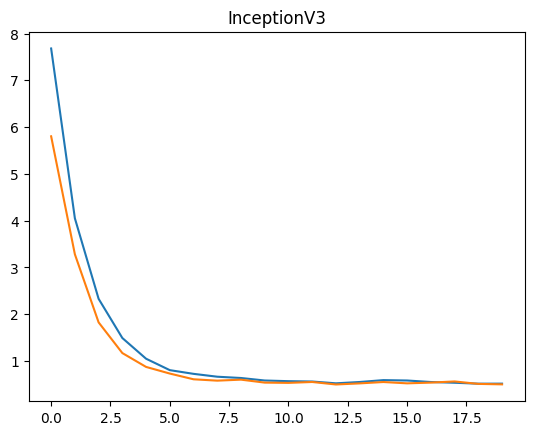

In [26]:
plt.title('InceptionV3')
sns.lineplot(model_9.history.history['loss'])
sns.lineplot(model_9.history.history['val_loss'])

In [27]:
# model_10 MobileNet

# let's build and train the model 
model_10 = Sequential()
model_10.add(mobilenet)
#ann layers
model_10.add(layers.Flatten())

# model.add(layers.BatchNormalization())
model_10.add(layers.Dense(units=128,activation='relu'))
model_10.add(layers.Dropout(0.5))

# model.add(layers.BatchNormalization())
# model.add(layers.Dense(units=64,activation='relu'))
# model.add(layers.Dropout(0.5))

#no of classes is 3
model_10.add(layers.Dense(units=3,activation='softmax'))

model_10.compile(optimizer=Adam(learning_rate=0.0009), loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])


model_10.fit(train_stack,train_df.label,epochs=20, validation_split = 0.2)

Epoch 1/20
25/52 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6200 - loss: 2.3811

W0000 00:00:1713885222.688044      76 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.7055 - loss: 1.6710

W0000 00:00:1713885226.377222      76 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1713885228.335644      76 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


52/52 ━━━━━━━━━━━━━━━━━━━━ 14s 153ms/step - accuracy: 0.7076 - loss: 1.6546 - val_accuracy: 0.9465 - val_loss: 0.1527
Epoch 2/20
25/52 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8928 - loss: 0.2722

W0000 00:00:1713885230.508158      76 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8919 - loss: 0.2698 - val_accuracy: 0.9513 - val_loss: 0.1438
Epoch 3/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9146 - loss: 0.2101 - val_accuracy: 0.9465 - val_loss: 0.1582
Epoch 4/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9211 - loss: 0.2045 - val_accuracy: 0.9538 - val_loss: 0.1520
Epoch 5/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9245 - loss: 0.2062 - val_accuracy: 0.9562 - val_loss: 0.1275
Epoch 6/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9187 - loss: 0.1922 - val_accuracy: 0.9538 - val_loss: 0.1278
Epoch 7/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9217 - loss: 0.1965 - val_accuracy: 0.9635 - val_loss: 0.1035
Epoch 8/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9385 - loss: 0.1514 - val_accuracy: 0.9538 - val_loss: 0.1179
Epoch 9/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9418 - loss: 0.1359 - val_accuracy: 0.9562 - val_loss: 0.1145
Epo

<Axes: title={'center': 'MobileNet'}>

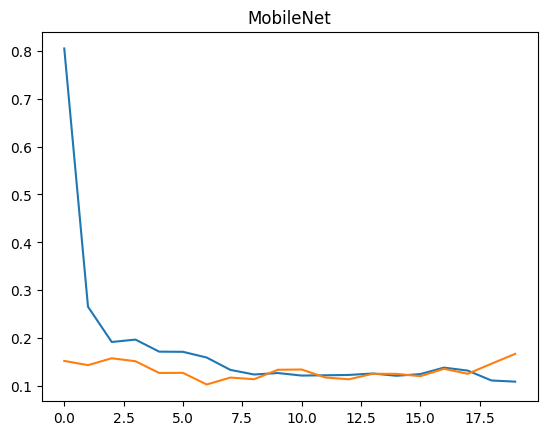

In [28]:
plt.title('MobileNet')
sns.lineplot(model_10.history.history['loss'])
sns.lineplot(model_10.history.history['val_loss'])

In [29]:
# model_11 Xception

# let's build and train the model 
model_11 = Sequential()
model_11.add(xception)
#ann layers
model_11.add(layers.Flatten())

model_11.add(layers.BatchNormalization())
model_11.add(layers.Dense(units=128,activation='relu', kernel_regularizer = keras.regularizers.l2(0.04)))
model_11.add(layers.Dropout(0.3))

# model.add(layers.BatchNormalization())
model_11.add(layers.Dense(units=128,activation='relu'))
model_11.add(layers.Dropout(0.3))

#no of classes is 3
model_11.add(layers.Dense(units=3,activation='softmax'))

model_11.compile(optimizer=Adam(learning_rate=0.0009), loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])


model_11.fit(train_stack,train_df.label,epochs=20, validation_split = 0.2)

Epoch 1/20
 5/52 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.5040 - loss: 11.0361

W0000 00:00:1713885254.991662      74 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step - accuracy: 0.6844 - loss: 8.3389

W0000 00:00:1713885263.831796      73 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1713885266.981865      75 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


52/52 ━━━━━━━━━━━━━━━━━━━━ 31s 335ms/step - accuracy: 0.6858 - loss: 8.3062 - val_accuracy: 0.8297 - val_loss: 4.9959
Epoch 2/20


W0000 00:00:1713885272.081398      74 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


52/52 ━━━━━━━━━━━━━━━━━━━━ 17s 33ms/step - accuracy: 0.8055 - loss: 3.8991 - val_accuracy: 0.8759 - val_loss: 2.6604
Epoch 3/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.8407 - loss: 2.4660 - val_accuracy: 0.8808 - val_loss: 1.9245
Epoch 4/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.8600 - loss: 1.9352 - val_accuracy: 0.8759 - val_loss: 1.9228
Epoch 5/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.8321 - loss: 1.8305 - val_accuracy: 0.8856 - val_loss: 1.4094
Epoch 6/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.8479 - loss: 1.4577 - val_accuracy: 0.8783 - val_loss: 1.2522
Epoch 7/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.8545 - loss: 1.3120 - val_accuracy: 0.8905 - val_loss: 1.1657
Epoch 8/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.8689 - loss: 1.2789 - val_accuracy: 0.8905 - val_loss: 1.0907
Epoch 9/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.8742 - loss: 1.0994 - val_accuracy: 0.8905 - val_loss: 1

<Axes: title={'center': 'Xception'}>

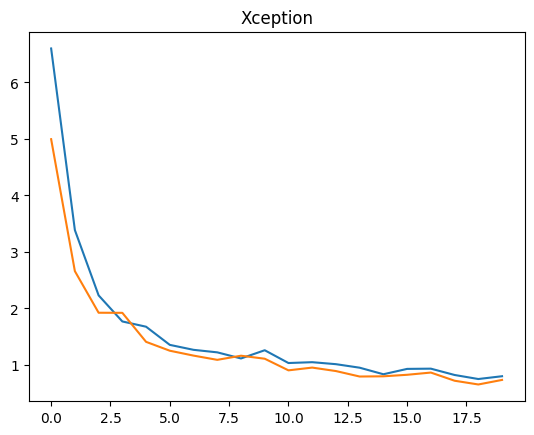

In [30]:
plt.title('Xception')
sns.lineplot(model_11.history.history['loss'])
sns.lineplot(model_11.history.history['val_loss'])

In [31]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True,start_from_epoch=25)

In [32]:
# model_12  VGG16+ 2CNN

# let's build and train the model 
model_12 = Sequential()
model_12.add(vgg16)
model_12.add(layers.Conv2D(32,(3,3),padding='same',
                           activation = 'relu',
                           kernel_regularizer = keras.regularizers.l2(0.04)))
model_12.add(layers.Dropout(0.4))
model_12.add(layers.Conv2D(32,(5,5),padding='same',
                           activation = 'relu',
                           kernel_regularizer = keras.regularizers.l2(0.04)))
model_12.add(layers.Dropout(0.4))
# ann layers
model_12.add(layers.Flatten())
model_12.add(layers.BatchNormalization())
model_12.add(layers.Dense(units=64,activation='relu',kernel_regularizer = keras.regularizers.l2(0.04)))
model_12.add(layers.Dropout(0.5))

#no of classes is 3
model_12.add(layers.Dense(units=3,activation='softmax'))
model_12.compile(optimizer=Adam(learning_rate=0.00015),
                 loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

model_12.fit(train_stack,train_df.label,epochs=80, validation_split = 0.2, callbacks= early_stopping)


Epoch 1/80
52/52 ━━━━━━━━━━━━━━━━━━━━ 18s 189ms/step - accuracy: 0.3437 - loss: 9.3152 - val_accuracy: 0.7762 - val_loss: 7.8338
Epoch 2/80
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.6043 - loss: 8.1264 - val_accuracy: 0.9173 - val_loss: 7.1355
Epoch 3/80
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.7174 - loss: 7.4337 - val_accuracy: 0.9319 - val_loss: 6.6396
Epoch 4/80
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.7859 - loss: 6.8532 - val_accuracy: 0.9465 - val_loss: 6.1883
Epoch 5/80
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.8124 - loss: 6.3664 - val_accuracy: 0.9416 - val_loss: 5.7714
Epoch 6/80
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.8524 - loss: 5.8856 - val_accuracy: 0.9416 - val_loss: 5.3877
Epoch 7/80
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.8756 - loss: 5.4841 - val_accuracy: 0.9489 - val_loss: 5.0163
Epoch 8/80
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.8930 - loss: 5.0639 - val_accuracy: 0.9538 -

<Axes: title={'center': 'VGG16+ 2CNN'}>

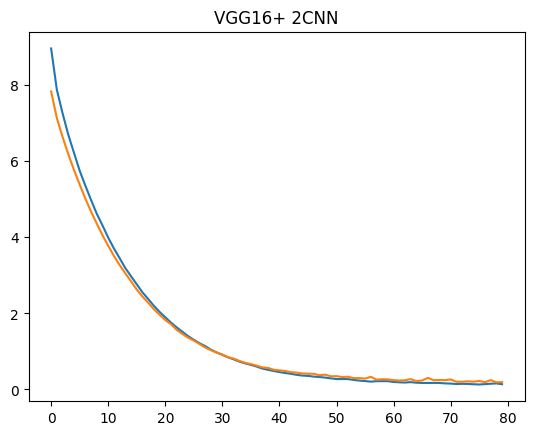

In [33]:
plt.title('VGG16+ 2CNN')
sns.lineplot(model_12.history.history['loss'])
sns.lineplot(model_12.history.history['val_loss'])


In [34]:
models = [model_1,model_2,model_3,model_4,model_5,model_6,model_7,model_8,model_9,model_10,model_11,model_12]
models_name = {model_1:'NASNetMobile', model_2:'EfficientNetB0', model_3:'VGG16',
               model_4:'VGG19', model_5:'Resnet50', model_6:'Resnet101', model_7:'DenseNet121',
               model_8:'VGG16+CNN',model_9:'InceptionV3',model_10:'MobileNet', model_11:'Xception',
               model_12:'VGG16+ 2CNN'}

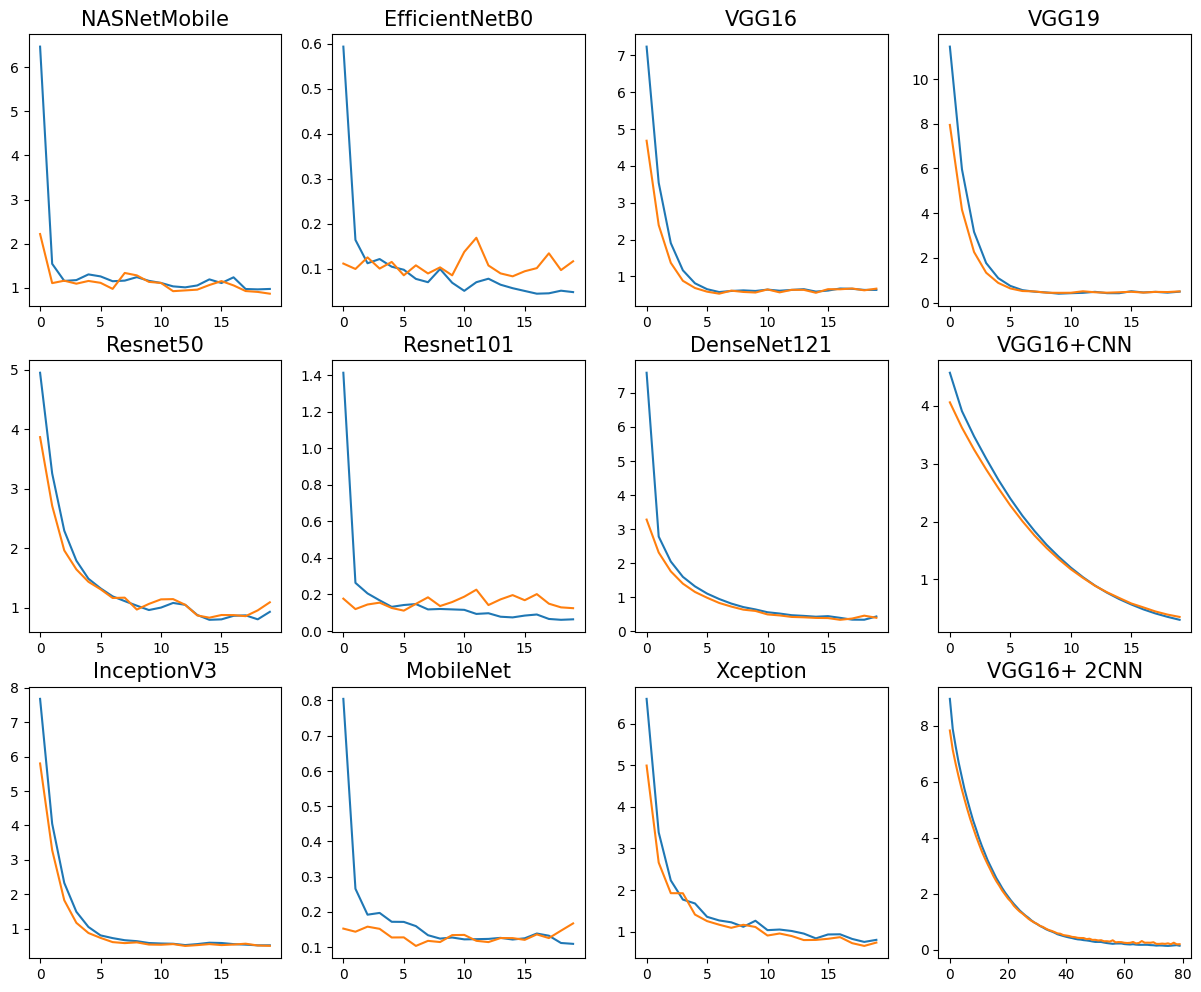

In [35]:
plt.figure(figsize = (15,12))

for i in range(len(models)):
    # creating 12 subplots as we have 12 models
    plt.subplot(3,4,i+1)
    plt.title(f'{models_name[models[i]]}',size=15)
    sns.lineplot(models[i].history.history['loss'])
    sns.lineplot(models[i].history.history['val_loss'])

In [36]:
# Now we will do the predictions on the test data:

test_df = []
import_data(test_df, test_path, classes)
test_df = pd.DataFrame(test_df,columns=['image','label'])
test_stack = np.stack(test_df.image)

In [37]:
#let's print the test dataset
test_df.head(5)

,image,label
0,"[[[78, 78, 78], [79, 79, 79], [75, 75, 75], [8...",0
1,"[[[50, 50, 50], [58, 58, 58], [67, 67, 67], [6...",2
2,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",2
3,"[[[71, 71, 71], [85, 85, 85], [102, 102, 102],...",2
4,"[[[52, 52, 52], [63, 63, 63], [70, 70, 70], [7...",0


In [38]:
# importing some performance metrices :
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [39]:
def  prediction(model,test_stack = test_stack, test_df = test_df):
    ''' we will take the different models and do the predictions '''
    
    output = model.predict(test_stack)
    prediction = [np.argmax(i) for i in output]
    print("-"*60)
    print(f'Model Name - {models_name[model]}')
    print(f'Accuracy Score : {accuracy_score(test_df.label,prediction)}')
    print(f'Precision Score : {precision_score(test_df.label,prediction, average="weighted")}')
    print(f'Recall Score : {recall_score(test_df.label,prediction, average="weighted")}')
    print(f'F1 Score : {f1_score(test_df.label,prediction, average="weighted")}')
    print()
    
for i in models:
    prediction(i)

4/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step

W0000 00:00:1713885530.406042      73 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


5/5 ━━━━━━━━━━━━━━━━━━━━ 29s 4s/step


W0000 00:00:1713885546.687438      75 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


------------------------------------------------------------
Model Name - NASNetMobile
Accuracy Score : 0.9240506329113924
Precision Score : 0.9240189873417722
Recall Score : 0.9240506329113924
F1 Score : 0.9237923017308189

1/5 ━━━━━━━━━━━━━━━━━━━━ 21s 5s/step

W0000 00:00:1713885552.127411      76 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


5/5 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step


W0000 00:00:1713885560.758443      73 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


------------------------------------------------------------
Model Name - EfficientNetB0
Accuracy Score : 0.9620253164556962
Precision Score : 0.9639173531578594
Recall Score : 0.9620253164556962
F1 Score : 0.9621008629083706

3/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step 

W0000 00:00:1713885561.499053      74 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step


W0000 00:00:1713885568.764588      76 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


------------------------------------------------------------
Model Name - VGG16
Accuracy Score : 0.9683544303797469
Precision Score : 0.9712313003452243
Recall Score : 0.9683544303797469
F1 Score : 0.9684199491574286

4/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step 

W0000 00:00:1713885569.595898      73 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 208ms/step


W0000 00:00:1713885570.427154      73 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


------------------------------------------------------------
Model Name - VGG19
Accuracy Score : 0.9746835443037974
Precision Score : 0.976558837318331
Recall Score : 0.9746835443037974
F1 Score : 0.9747339086055804

5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step
------------------------------------------------------------
Model Name - Resnet50
Accuracy Score : 0.9367088607594937
Precision Score : 0.938670204021672
Recall Score : 0.9367088607594937
F1 Score : 0.9365725531637911

5/5 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step
------------------------------------------------------------
Model Name - Resnet101
Accuracy Score : 0.9683544303797469
Precision Score : 0.968512184964095
Recall Score : 0.9683544303797469
F1 Score : 0.9683781270372542

4/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step

W0000 00:00:1713885603.979742      73 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


5/5 ━━━━━━━━━━━━━━━━━━━━ 26s 4s/step


W0000 00:00:1713885620.494010      74 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


------------------------------------------------------------
Model Name - DenseNet121
Accuracy Score : 0.9620253164556962
Precision Score : 0.9631354094061794
Recall Score : 0.9620253164556962
F1 Score : 0.9618640626410997

5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 266ms/step
------------------------------------------------------------
Model Name - VGG16+CNN
Accuracy Score : 0.9556962025316456
Precision Score : 0.9561328554380805
Recall Score : 0.9556962025316456
F1 Score : 0.9555331302458445

4/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

W0000 00:00:1713885629.495727      73 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


5/5 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step


W0000 00:00:1713885639.424179      75 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


------------------------------------------------------------
Model Name - InceptionV3
Accuracy Score : 0.9177215189873418
Precision Score : 0.917572650171418
Recall Score : 0.9177215189873418
F1 Score : 0.9175921184081096

1/5 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step

W0000 00:00:1713885641.207140      74 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 669ms/step


W0000 00:00:1713885643.883443      76 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


------------------------------------------------------------
Model Name - MobileNet
Accuracy Score : 0.9620253164556962
Precision Score : 0.9618961508654095
Recall Score : 0.9620253164556962
F1 Score : 0.9618981146450805

3/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step

W0000 00:00:1713885646.763557      76 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step


W0000 00:00:1713885652.831463      76 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


------------------------------------------------------------
Model Name - Xception
Accuracy Score : 0.9240506329113924
Precision Score : 0.9253885988476457
Recall Score : 0.9240506329113924
F1 Score : 0.9243183309005109

5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 284ms/step
------------------------------------------------------------
Model Name - VGG16+ 2CNN
Accuracy Score : 0.9683544303797469
Precision Score : 0.9694543260467864
Recall Score : 0.9683544303797469
F1 Score : 0.9684095757587217



#### Observation :
* Densenet121, VGG16 with CNN's are performing best.
* Achieved a accuracy of 98.10% 

In [40]:
plot_number = 0
def  plot_confusion_matrix(model,test_stack = test_stack, test_df = test_df):
    ''' we will Print the confusion matrix '''
    
    output = model.predict(test_stack)
    prediction = [np.argmax(i) for i in output]
    accuracy = accuracy_score(test_df.label,prediction)
    # where the accuracy is more than 94% we will show the CM as blue...
    if accuracy > 0.94:
        cmap = 'Blues'
    else :
        cmap = 'Reds'
    cm = confusion_matrix(test_df.label, prediction)
    sns.heatmap(cm, annot=True, cmap=cmap, fmt='g')  
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(f'Confusion Matrix - {models_name[model]}')
    plt.show()

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


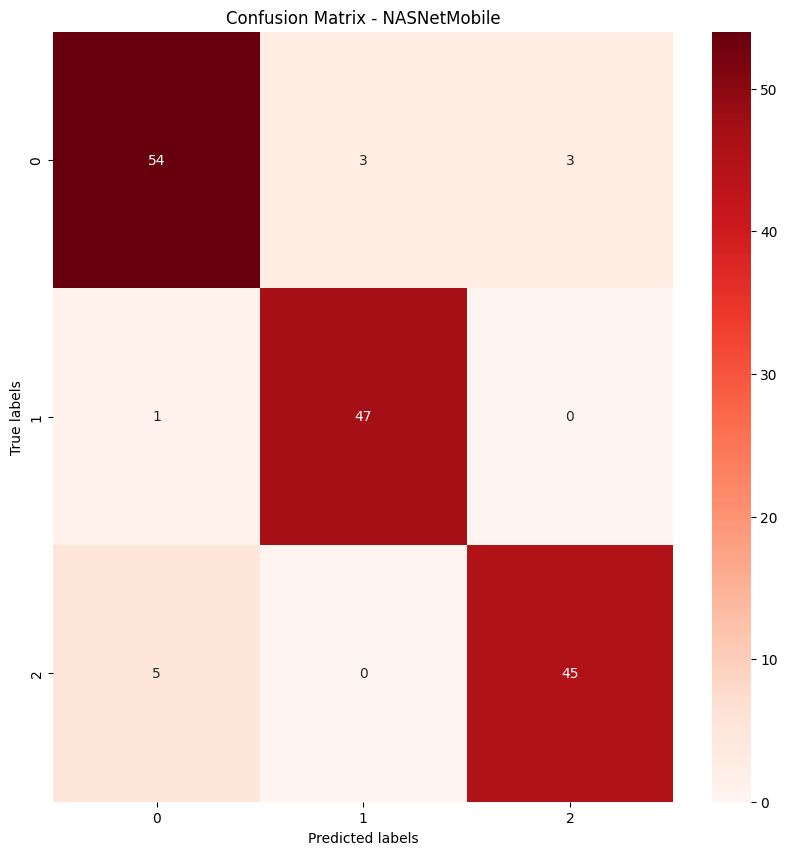

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


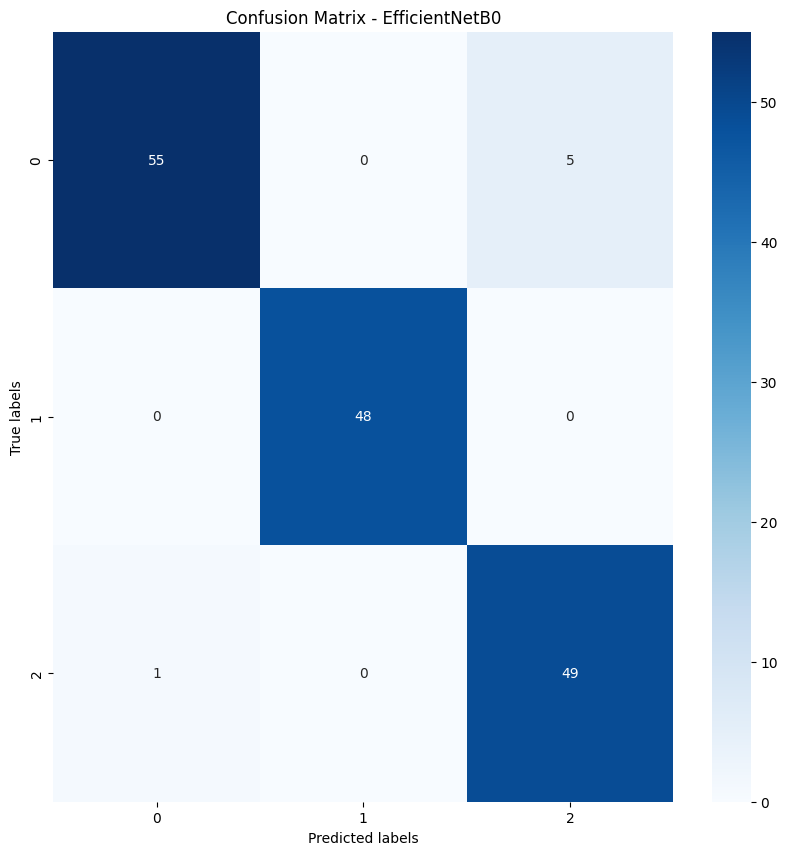

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


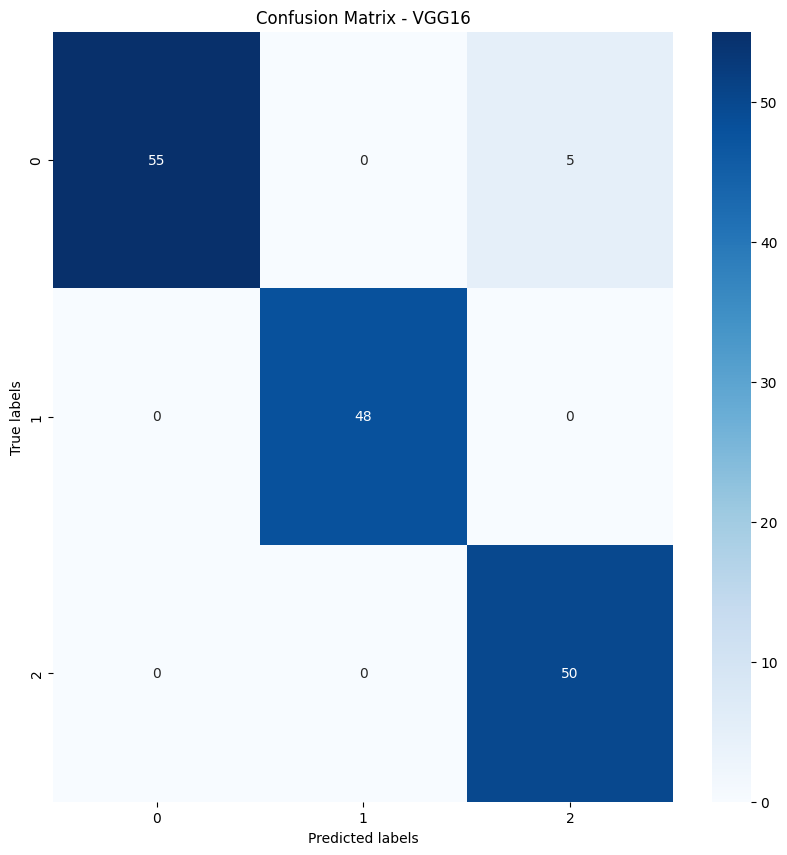

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


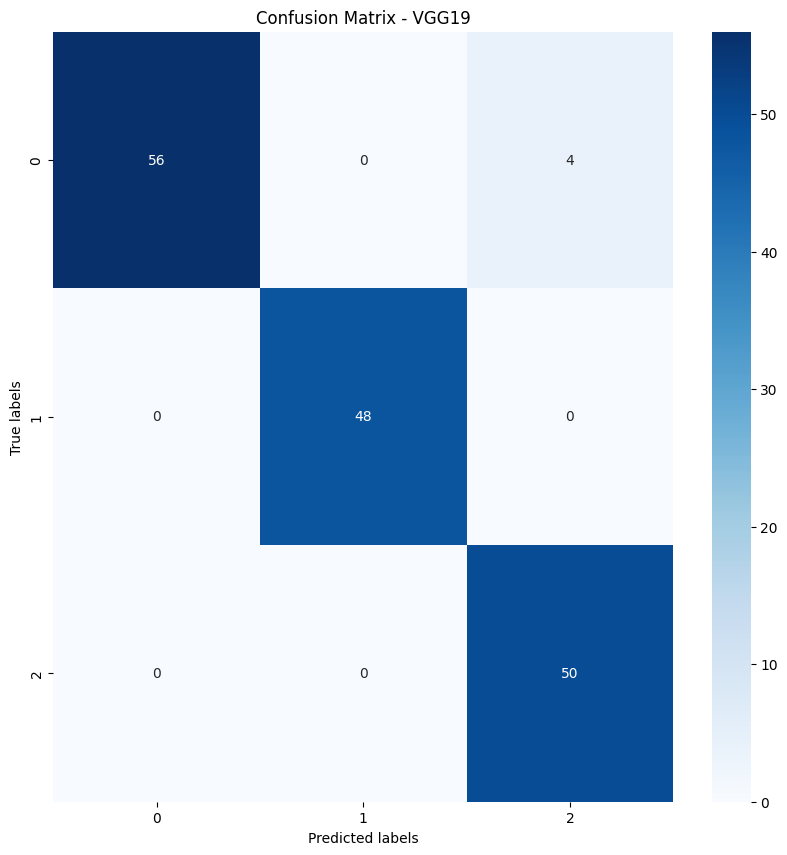

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


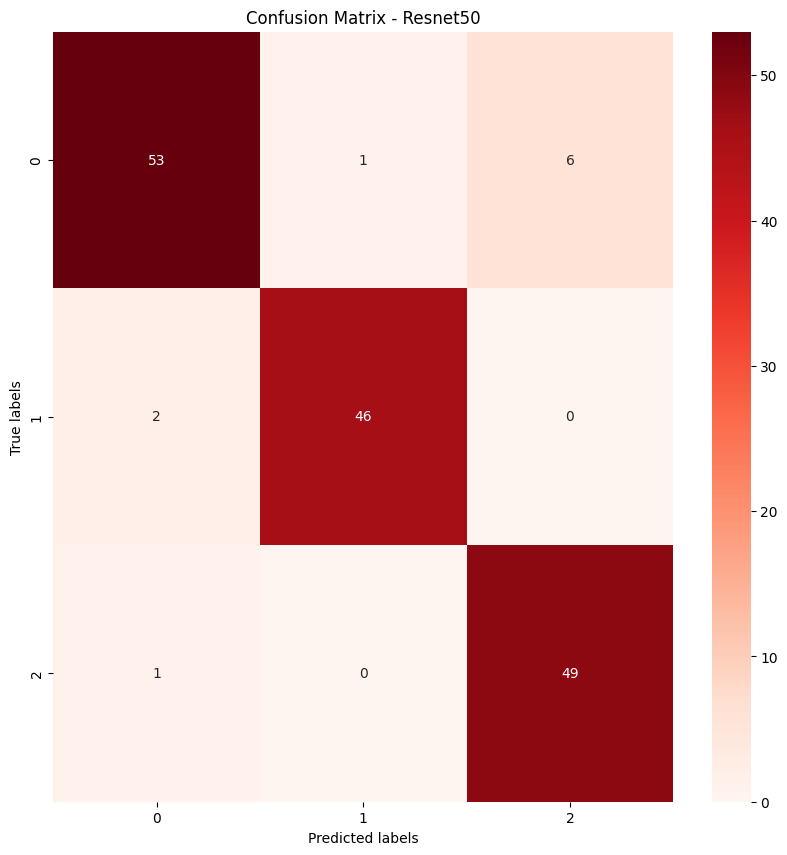

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


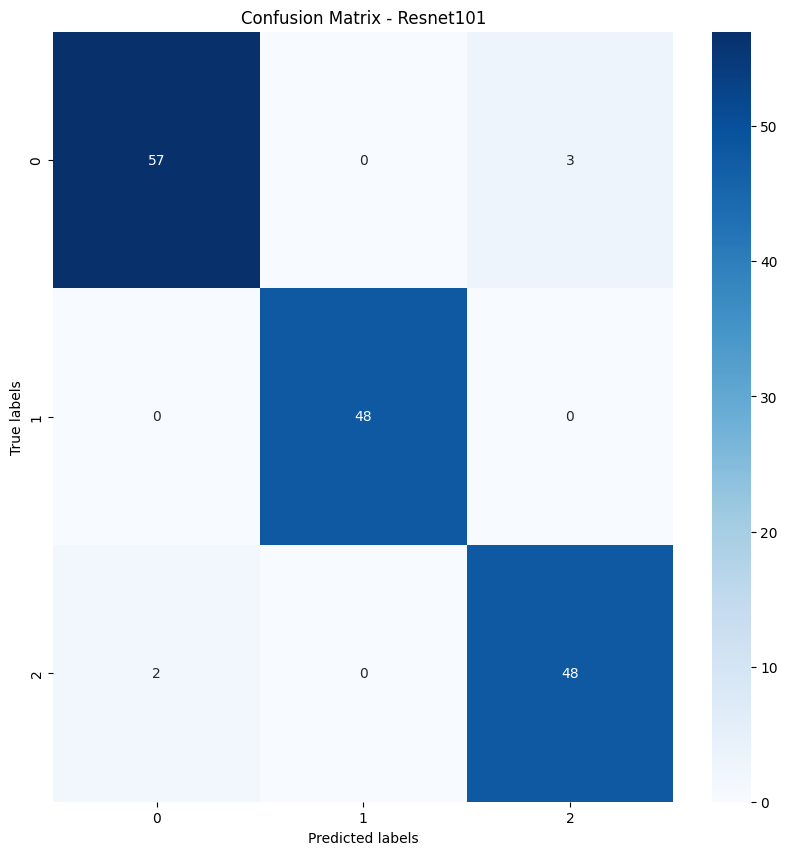

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


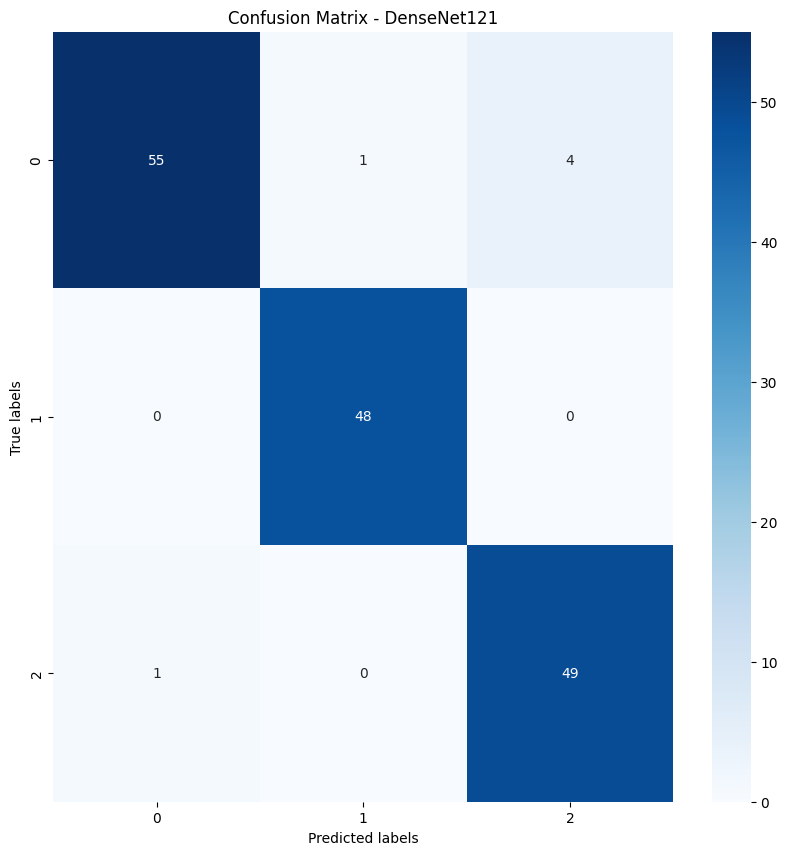

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


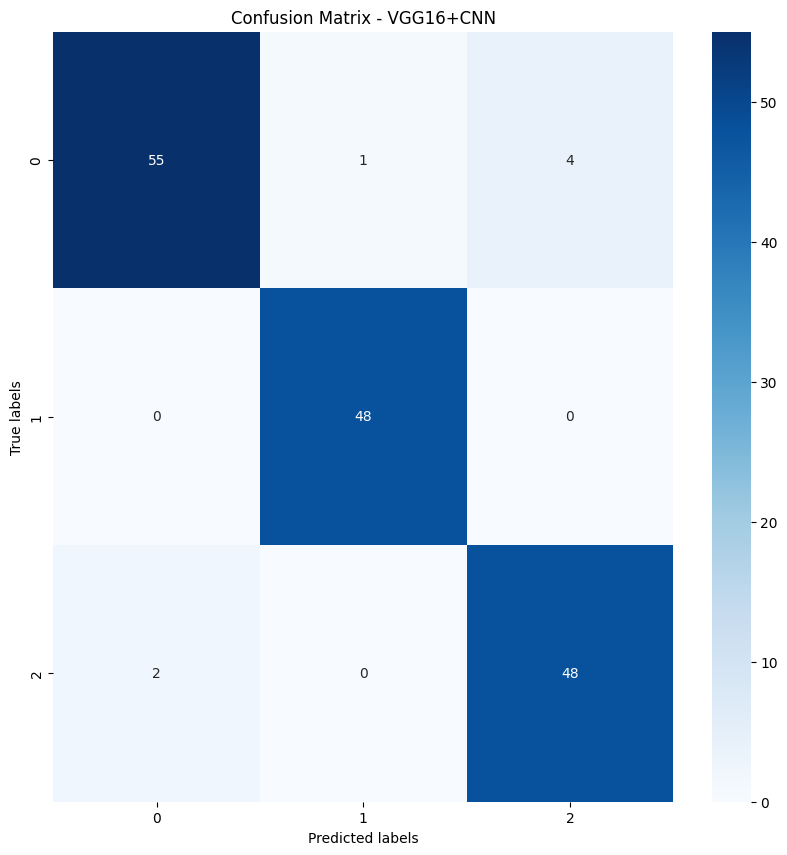

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


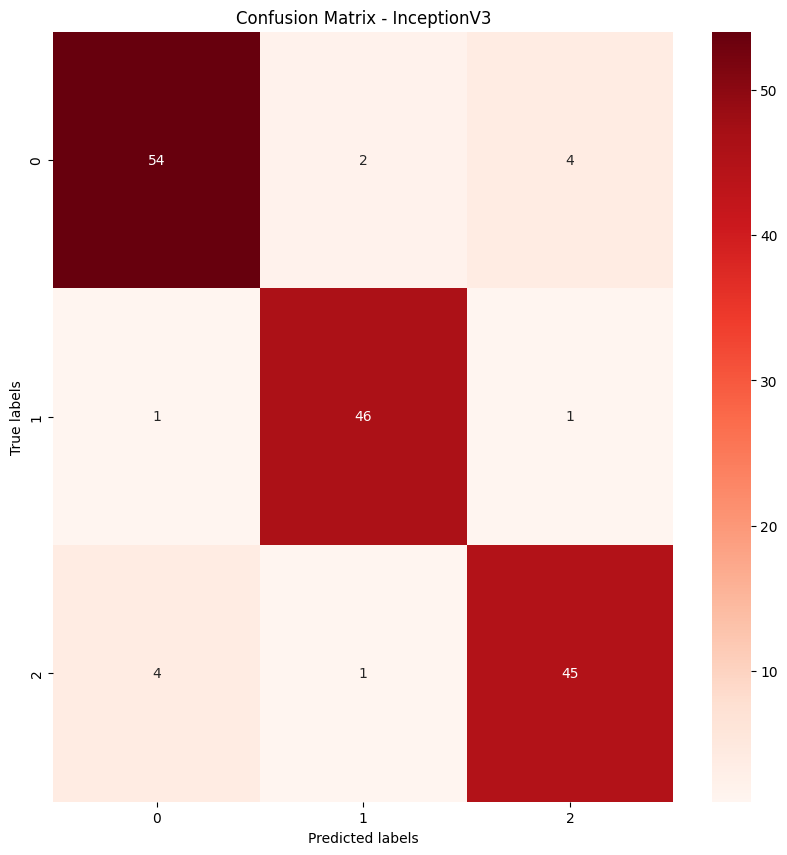

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


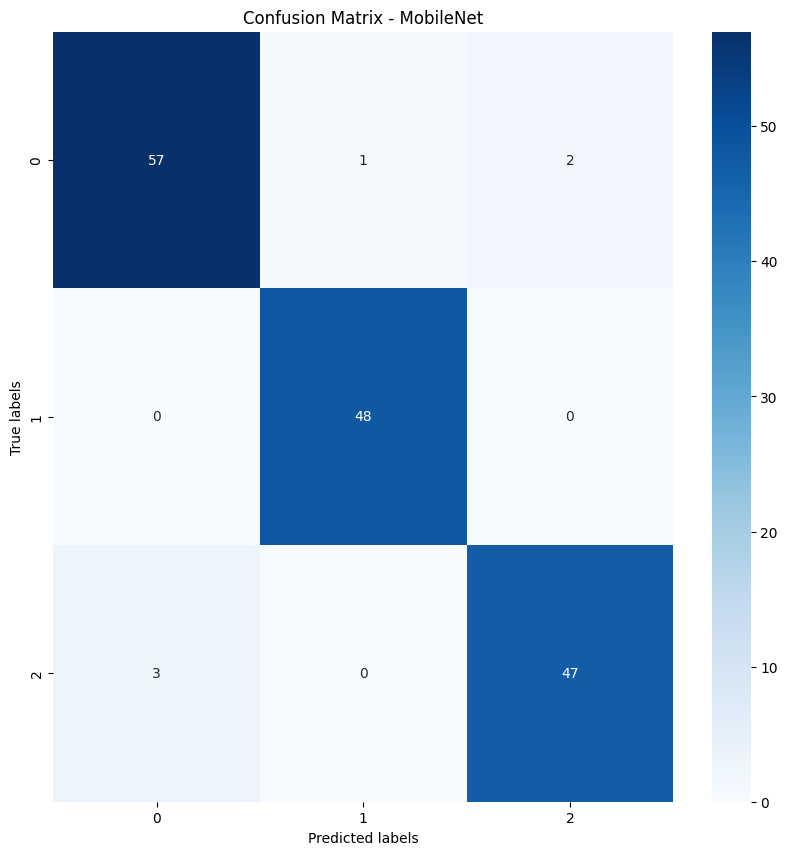

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


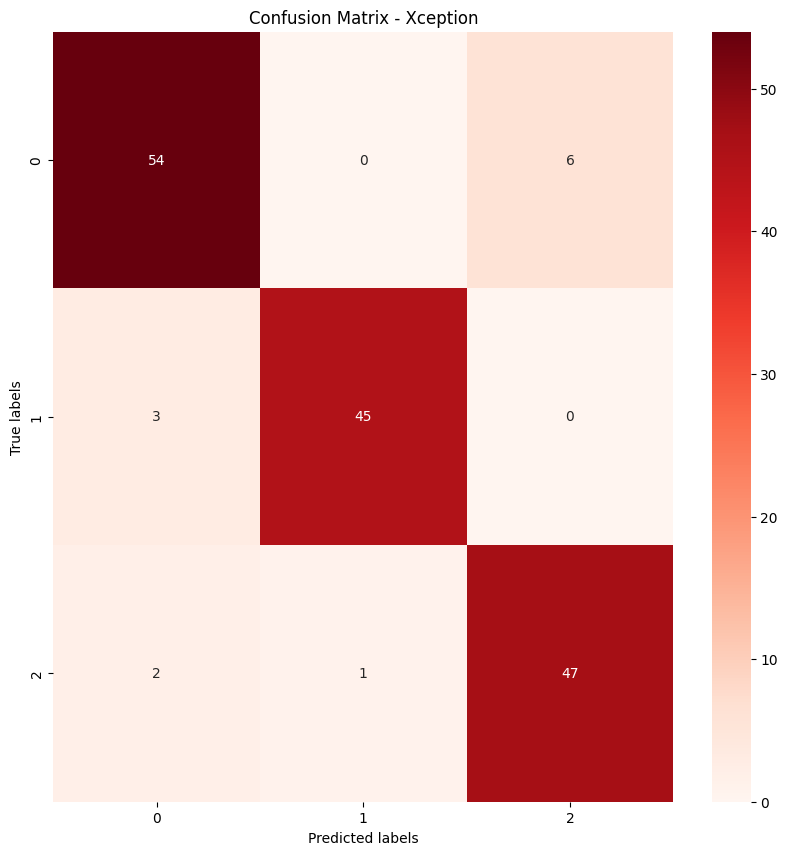

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


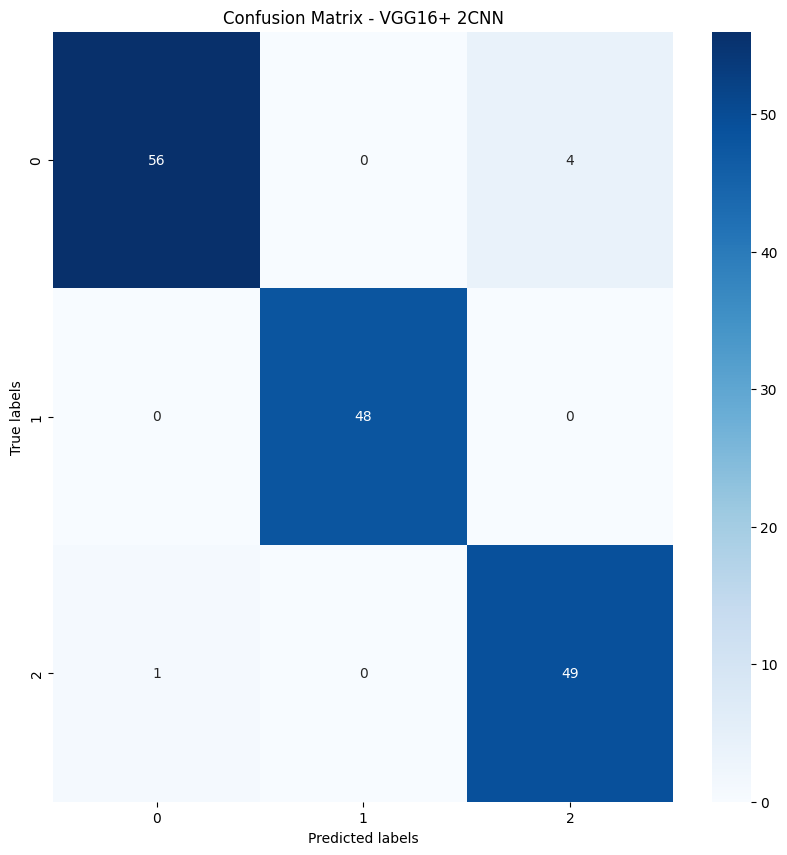

In [41]:
for i in models:
    plot_number = plot_number+1
    plt.figure(figsize=(10, 10))
    plot_confusion_matrix(i)